In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax3
import seaborn as sns
import timeit

plt.style.use("seaborn-v0_8-deep")
plt.rcParams["figure.figsize"] = (15, 10)

In [3]:
# inputs --> based on 2020 covid values from robertmartin8/pValuation/master/marketimpliedsurfaces/marketimpliedsurfaces2.ipynb
base_year_earnings = 163
base_cash_return = 0.855
FY20_earnings_drop = -0.3
subseq_growth = 0.08
RFR = 0.0134
equity_risk_prem = 0.0525
lt_growth_rate = 0.0134
lt_roe = 0.15

In [4]:
# calc params
disc_factor = 1 / (1 + RFR + equity_risk_prem)
FY20_earnings_drop = -0.4
subseq_growth = 0.1

In [11]:
timeit.timeit()

# %%time
%timeit
# valuation
lt_cash_return = 1 - lt_growth_rate / lt_roe

# earnings
earnings = [base_year_earnings * (1 + FY20_earnings_drop)]
for _ in range(2, 6):
    earnings.append(earnings[-1] * (1 + subseq_growth))

# return fractions
return_fractions = []
for i in range(1, 6):
    return_fractions.append(
        base_cash_return + i * (lt_cash_return - base_cash_return) / 5
    )

# Cash Flows
cash_flows = []
for i in range(5):
    cash_flows.append(earnings[i] * return_fractions[i])

# pv_cash_flows
pv_cf = 0
for i in range(5):
    pv_cf += cash_flows[i] * disc_factor ** (i + 1)

# terminalvalue
tv = cash_flows[-1] * (1 + lt_growth_rate) / (RFR + equity_risk_prem - lt_growth_rate)
pv_tv = tv * disc_factor**5

sp_value = pv_cf + pv_tv
sp_value


2264.235489127622

In [12]:
def valu(
    drop,
    growth,
    base_year_earnings=163,
    base_cash_return=0.855,
    RFR=0.0134,
    equity_risk_premium=0.0525,
    lt_growth_rate=0.0134,
    lt_roe=0.15,
):
    lt_cash_return = 1 - lt_growth_rate / lt_roe
    disc_factor = 1 / (1 + RFR + equity_risk_premium)

    pv = 0
    earnings = base_year_earnings
    for i in range(1, 6):
        if i == 1:
            earnings *= 1 + drop
        else:
            earnings *= 1 + growth

        ret_frac = base_cash_return + i * (lt_cash_return - base_cash_return) / 5

        cash_flow = earnings * ret_frac
        pv += cash_flow * disc_factor**i
    terminal_value = (
        earnings
        * (1 + lt_growth_rate)
        * lt_cash_return
        / (RFR + equity_risk_premium - lt_growth_rate)
    )
    pv_terminal = terminal_value * disc_factor**5

    return pv + pv_terminal


In [13]:
%%timeit
valu(-0.4, 0.12)


2.17 µs ± 46.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [14]:
n_res = 100
growth = np.linspace(-0.05, 0.25, n_res)
drop = np.linspace(-0.5, 0, n_res)

X, Y = np.meshgrid(growth, drop)
Z = np.zeros((n_res, n_res))
for i, x in enumerate(growth):
    for j, y in enumerate(drop):
        Z[i, j] = valu(y, x)


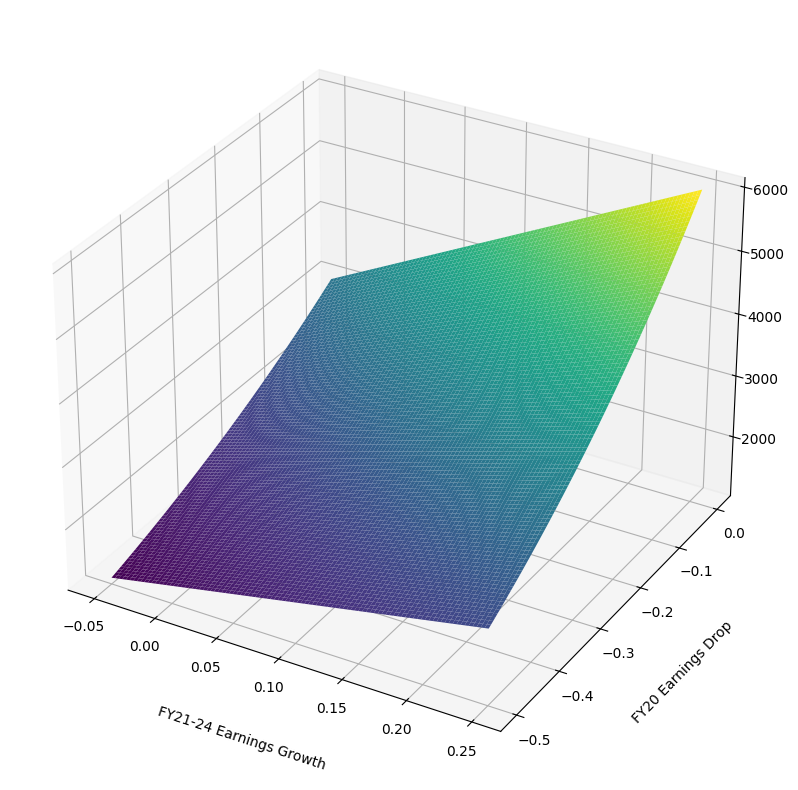

In [15]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.set_xlabel("FY21-24 Earnings Growth", labelpad=20)
ax.set_ylabel("FY20 Earnings Drop", labelpad=20)
ax.set_zlabel("Price", labelpad=20);
